In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
df = pd.read_csv('pizza.csv')

In [3]:
df.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   company          129 non-null    object
 1   price_rupiah     129 non-null    object
 2   diameter         129 non-null    object
 3   topping          129 non-null    object
 4   variant          129 non-null    object
 5   size             129 non-null    object
 6   extra_sauce      129 non-null    object
 7   extra_cheese     129 non-null    object
 8   extra_mushrooms  129 non-null    object
dtypes: object(9)
memory usage: 9.2+ KB


In [5]:
df.isnull().sum().sum()

np.int64(0)

In [6]:
df.duplicated().sum()

np.int64(2)

In [7]:
df = df.drop_duplicates()

In [8]:
df.duplicated().any()

np.False_

In [9]:
df = df.rename(columns={'price_rupiah':'price'})

In [10]:
df.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes


In [11]:
df['price'] = pd.to_numeric(df['price'].str.replace(r'[^\d.]', '', regex=True))

In [12]:
df['diameter'] = df['diameter'].str.replace(r'[^\d.]', '',regex=True)

In [13]:
df.sample(5)

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
112,E,33000,8.5,chicken,classic,small,no,yes,yes
40,B,76000,12,chicken,crunchy,medium,no,no,no
95,D,31000,8.5,mushrooms,classic,small,yes,yes,no
54,C,105000,14,meat,BBQ_meat_fiesta,large,yes,no,yes
123,E,96000,12,mushrooms,double_decker,medium,no,yes,yes


In [14]:
df['diameter'] = df['diameter'].astype(float)

In [15]:
df.dtypes

company             object
price                int64
diameter           float64
topping             object
variant             object
size                object
extra_sauce         object
extra_cheese        object
extra_mushrooms     object
dtype: object

In [16]:
## Exploratory Data Analysis!

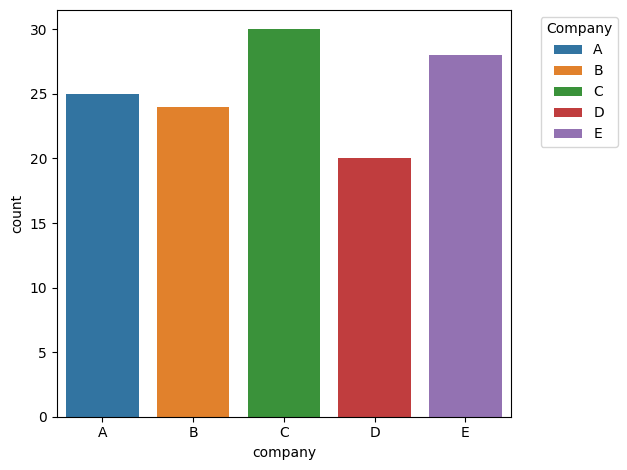

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.countplot(
    x='company',
    data=df,
    hue='company',
    legend=True
)

ax.legend(
    title='Company',
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

plt.tight_layout()
plt.show()


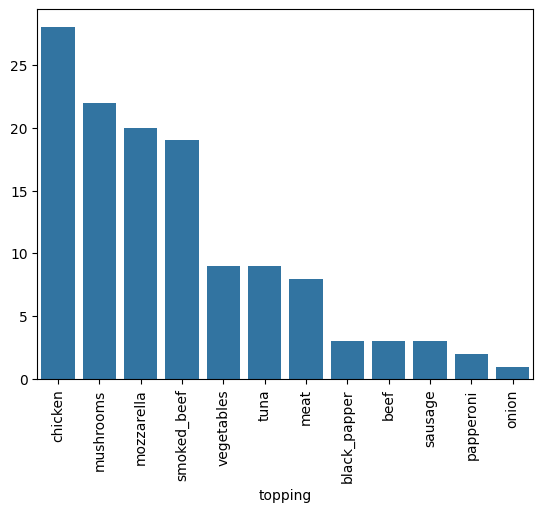

In [18]:
counts = df['topping'].value_counts()

sns.barplot(x=counts.index, y=counts.values)
plt.xticks(rotation=90)
plt.show()

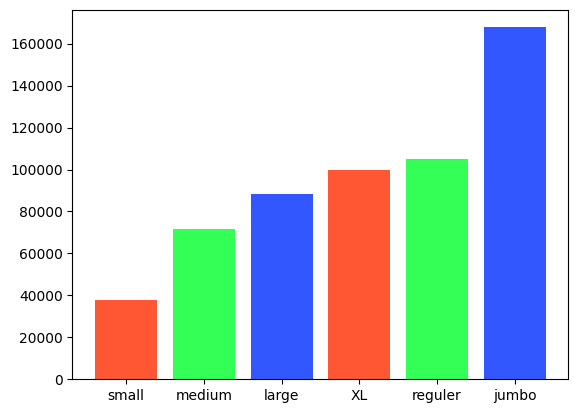

In [19]:
counts = df.groupby('size')['price'].mean().sort_values()
colors = ['#FF5733', '#33FF57', '#3357FF'] 

plt.bar(counts.index, counts.values, color=colors)
plt.show()

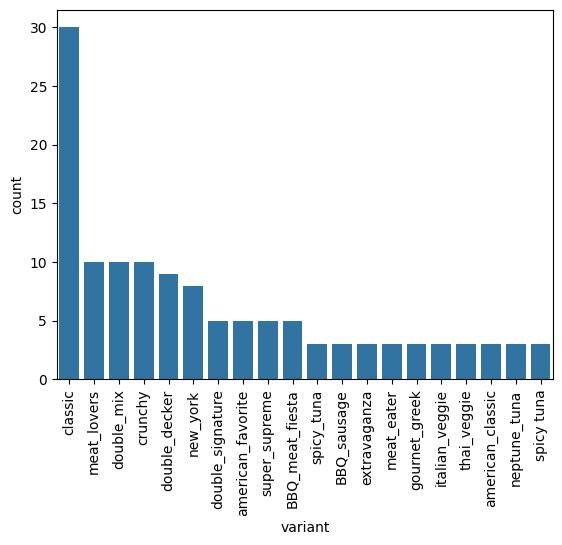

In [20]:
sns.countplot(x=df['variant'],data=df,order=df['variant'].value_counts().index)
plt.xticks(rotation=90);

<Axes: xlabel='extra_cheese', ylabel='count'>

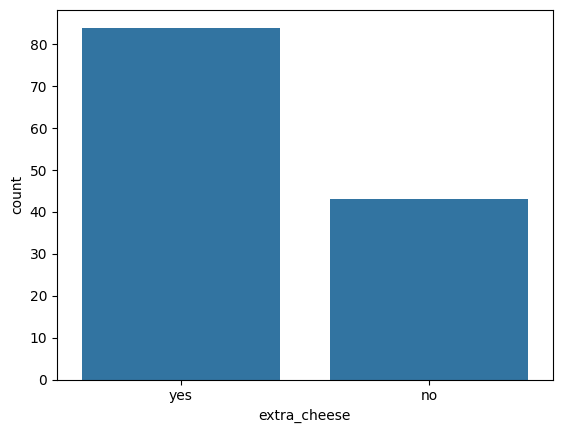

In [21]:
sns.countplot(x=df['extra_cheese'])

<Axes: xlabel='company', ylabel='price'>

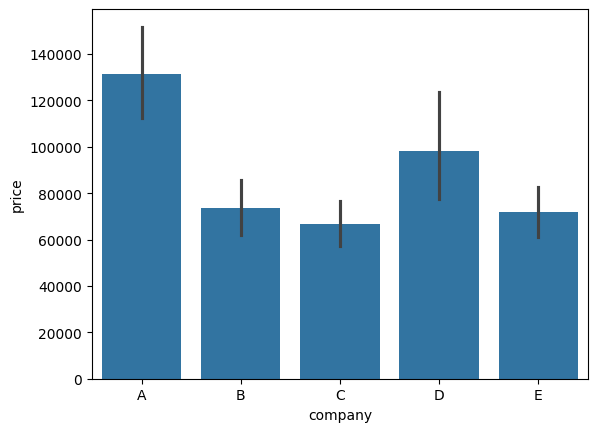

In [22]:
sns.barplot(x=df['company'],y=df['price'],data=df)

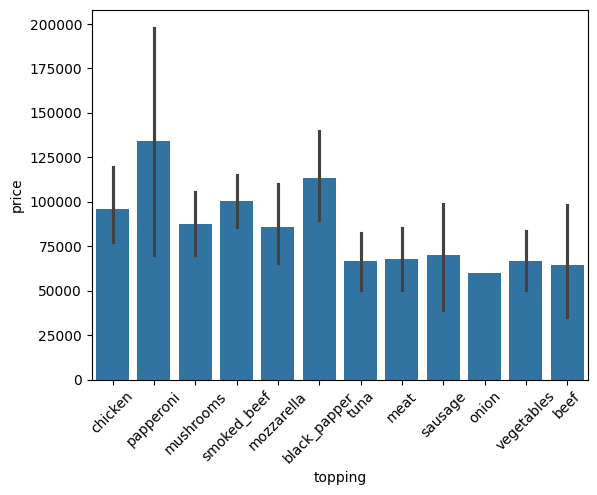

In [23]:
sns.barplot(x=df['topping'],y=df['price'],data=df)
plt.xticks(rotation=45);

<Axes: xlabel='price', ylabel='size'>

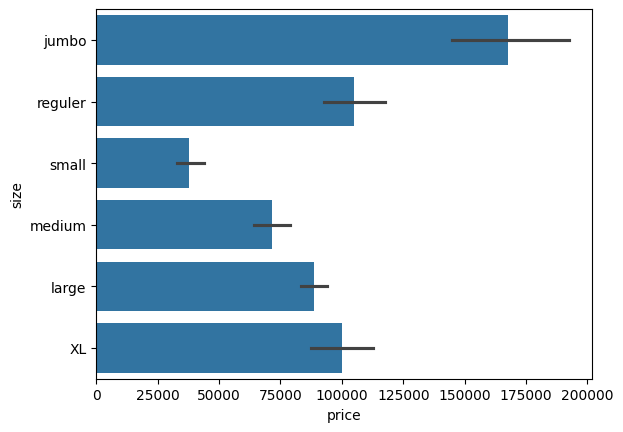

In [24]:
sns.barplot(x=df['price'],y=df['size'],data=df)

<Axes: xlabel='price', ylabel='variant'>

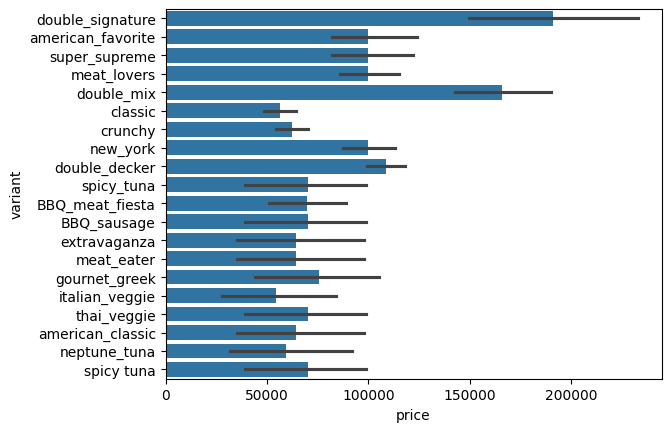

In [25]:
sns.barplot(x=df['price'],y=df['variant'],data=df)

In [26]:
x = df.drop(columns='price')
y = df['price']

<Axes: xlabel='diameter'>

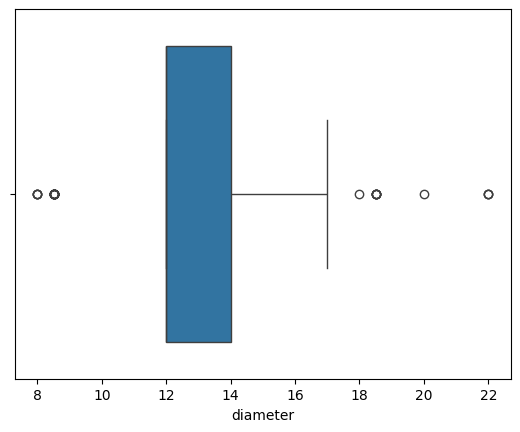

In [27]:
sns.boxplot(x='diameter',data=df)

<Axes: xlabel='price'>

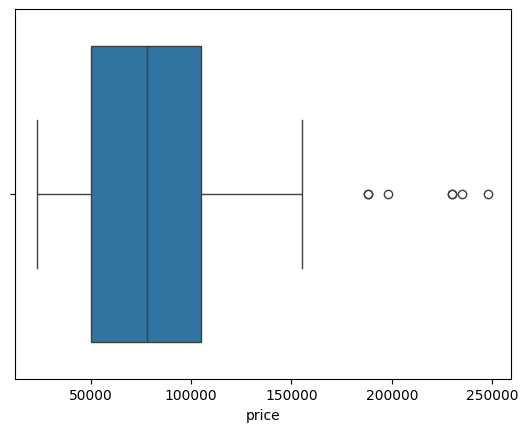

In [28]:
sns.boxplot(x='price',data=df)

In [29]:
# For binary columns:
bin_c = ['extra_sauce','extra_cheese','extra_mushrooms']

In [30]:
for col in bin_c:
    df[col] = df[col].map({'yes':1, 'no':0})

In [31]:
cats_of_columns = ['company', 'topping', 'variant', 'size']
df = pd.get_dummies(df, columns=cats_of_columns, drop_first=True)

In [32]:
df.columns

Index(['price', 'diameter', 'extra_sauce', 'extra_cheese', 'extra_mushrooms',
       'company_B', 'company_C', 'company_D', 'company_E',
       'topping_black_papper', 'topping_chicken', 'topping_meat',
       'topping_mozzarella', 'topping_mushrooms', 'topping_onion',
       'topping_papperoni', 'topping_sausage', 'topping_smoked_beef',
       'topping_tuna', 'topping_vegetables', 'variant_BBQ_sausage',
       'variant_american_classic', 'variant_american_favorite',
       'variant_classic', 'variant_crunchy', 'variant_double_decker',
       'variant_double_mix', 'variant_double_signature',
       'variant_extravaganza', 'variant_gournet_greek',
       'variant_italian_veggie', 'variant_meat_eater', 'variant_meat_lovers',
       'variant_neptune_tuna', 'variant_new_york', 'variant_spicy tuna',
       'variant_spicy_tuna', 'variant_super_supreme', 'variant_thai_veggie',
       'size_jumbo', 'size_large', 'size_medium', 'size_reguler',
       'size_small'],
      dtype='object')

In [33]:
X = df.drop(columns='price')
Y = df['price']

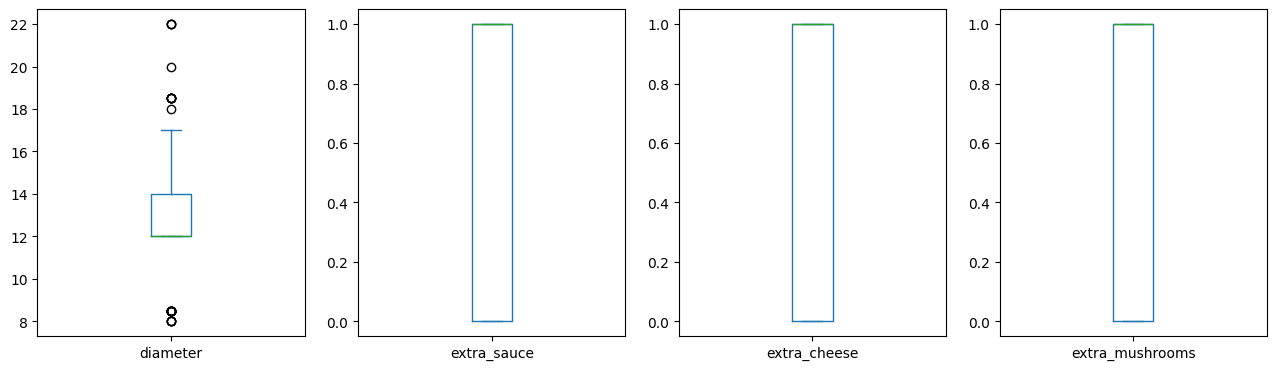

In [34]:
num_of_cols = 5
num_of_rows = math.ceil(len(X.columns)/num_of_cols)
X.plot(kind='box',subplots=True,layout=(num_of_rows,num_of_cols),figsize=(20,5*num_of_rows))
plt.show()

In [35]:
df.head()

,price,diameter,extra_sauce,extra_cheese,extra_mushrooms,company_B,company_C,company_D,company_E,topping_black_papper,...,variant_new_york,variant_spicy tuna,variant_spicy_tuna,variant_super_supreme,variant_thai_veggie,size_jumbo,size_large,size_medium,size_reguler,size_small
0,235000,22.0,1,1,0,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,198000,20.0,1,1,0,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,120000,16.0,1,1,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,155000,14.0,1,0,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,248000,18.0,1,0,1,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [36]:
# Now we are removing outliers

In [37]:
cols = ['price', 'diameter']

Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df[cols] = df[cols].clip(lower=lower, upper=upper, axis=1)

<Axes: xlabel='price'>

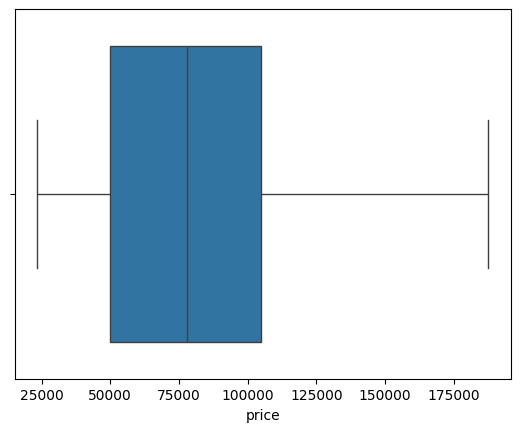

In [38]:
sns.boxplot(x='price', data=df[cols])

<Axes: xlabel='diameter'>

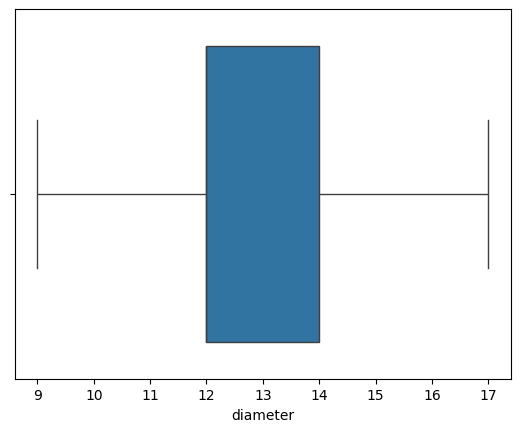

In [39]:
sns.boxplot(x='diameter',data=df[cols])

In [40]:
from sklearn.model_selection import train_test_split

X1 = df.drop(columns=['price'])
y1 = df['price']

X_train, X_test, y_train, y_test = train_test_split(
    X1, y1, test_size=0.2, random_state=42
)

In [62]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

lr_pipeline.fit(X_train, y_train)

y_pred_lr = lr_pipeline.predict(X_test)

print("Linear Regression R2:", r2_score(y_test, y_pred_lr))
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_lr))

Linear Regression R2: 0.852583657093618
Linear Regression MSE: 244174673.3021832


In [63]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = RandomForestRegressor(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))

MSE: 183777483.97435898
R2: 0.889047442023161


In [64]:
print("Linear Regression Train R2:", lr_pipeline.score(X_train, y_train))
print("Linear Regression Test R2:", lr_pipeline.score(X_test, y_test))

Linear Regression Train R2: 0.9277088966252582
Linear Regression Test R2: 0.852583657093618


In [65]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
print(scores)
print("CV mean:", scores.mean())

[0.86884221 0.92833093 0.79062588 0.8928414  0.96702463]
CV mean: 0.8895330086722435


In [66]:
df.to_csv("cleaned_pizza_data.csv")
joblib.dump(model, "pizza_price_model.pkl")

['pizza_price_model.pkl']